# EDA Task 6

#### **Task 6**: How many states cover 50% of US air traffic? 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
traffic = flights[['fl_date','origin_city_name','dest_city_name', 'cancelled', 'diverted','flights']]

In [8]:
traffic.head()

,fl_date,origin_city_name,dest_city_name,cancelled,diverted,flights
0,2018-07-10,"San Antonio, TX","Nashville, TN",0.0,0.0,1.0
1,2019-10-10,"Chicago, IL","Orlando, FL",0.0,0.0,1.0
2,2019-07-18,"Lawton/Fort Sill, OK","Dallas/Fort Worth, TX",0.0,0.0,1.0
3,2018-11-25,"Savannah, GA","Chicago, IL",1.0,0.0,1.0
4,2018-10-24,"Detroit, MI","Santa Ana, CA",0.0,0.0,1.0


In [10]:
# create state column
traffic['States_orig'] = traffic['origin_city_name'].str.slice(-2)
traffic['States_dest'] = traffic['dest_city_name'].str.slice(-2)           

In [12]:
traffic.shape

(10000, 8)

In [13]:
#drop all cancelled flights as they don't contribute to the air traffic
traffic = traffic[traffic.cancelled != 1]

In [14]:
traffic.shape

(9842, 8)

In [16]:
#count all states
orig_count = traffic.groupby(by = ['States_orig']).agg(orig_count = ('States_orig', 'count'))
dest_count = traffic.groupby(by = ['States_dest']).agg(dest_count = ('States_dest', 'count'))

In [17]:
#merge them
state_count = pd.concat([orig_count, dest_count], axis=1, join='outer')

In [18]:
state_count.shape

(53, 2)

In [19]:
#ensure they are the same size
orig_count.shape, dest_count.shape

((53, 1), (53, 1))

In [20]:
state_count['sum'] = state_count['orig_count'] + state_count['dest_count']

In [21]:
state_count.head()

,orig_count,dest_count,sum
AK,51,46,97
AL,50,59,109
AR,43,32,75
AZ,224,268,492
CA,1098,1036,2134


In [23]:
state_count['% total flights'] = round(state_count['sum']/state_count['sum'].sum()*100, 2)

In [24]:
state_count = state_count.sort_values(by = ['sum'], ascending = False).reset_index()

In [25]:
state_count.rename(columns={"index": "state"}, inplace = True)

In [26]:
state_count['% cumsum'] = state_count['% total flights'].cumsum()

In [27]:
state_count.head(8)

,state,orig_count,dest_count,sum,% total flights,% cumsum
0,CA,1098,1036,2134,10.84,10.84
1,TX,948,934,1882,9.56,20.40
2,FL,702,700,1402,7.12,27.52
3,IL,622,636,1258,6.39,33.91
4,GA,539,496,1035,5.26,39.17
5,NY,458,526,984,5.00,44.17
6,NC,431,435,866,4.40,48.57
7,CO,446,403,849,4.31,52.88


for our 10 000 dataset, 8 states cover 50% of air traffic.

<AxesSubplot:xlabel='state', ylabel='% total flights'>

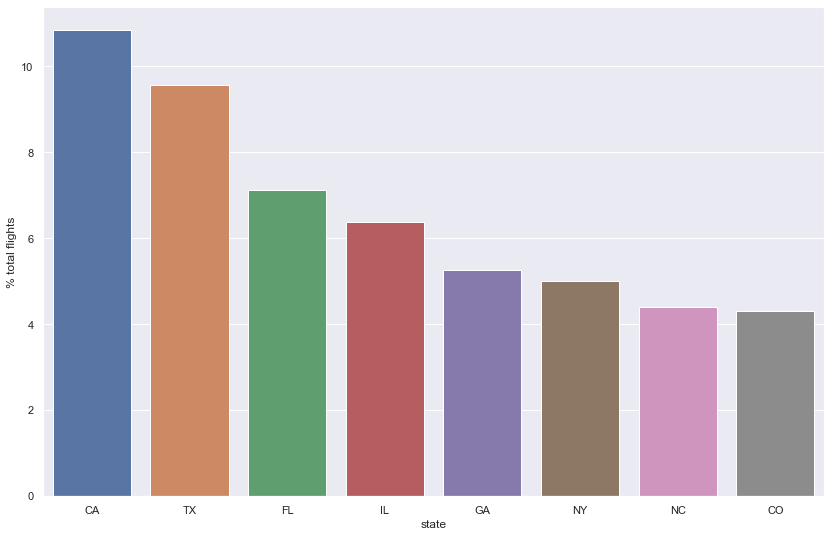

In [31]:
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(data=state_count.head(8), x="state", y = "% total flights")

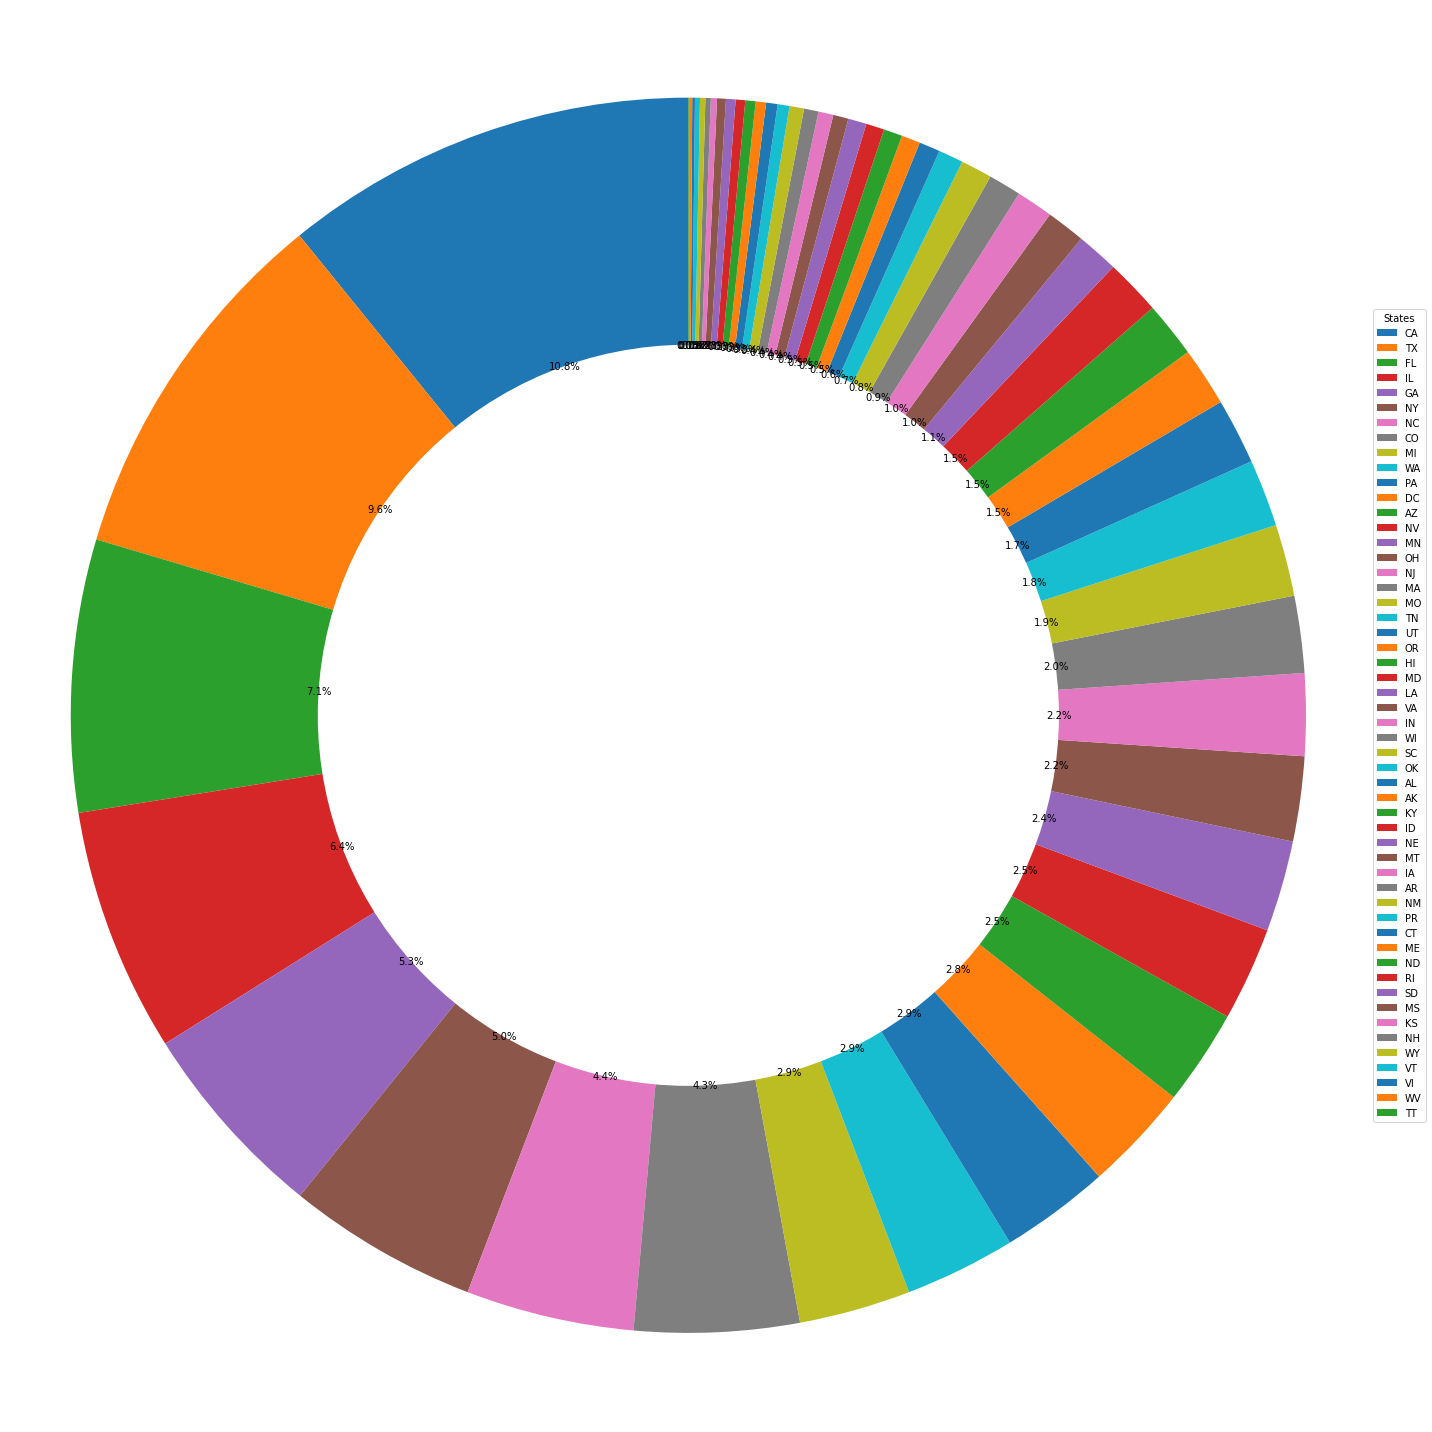

In [30]:
import matplotlib.pyplot as plt
labels = state_count['state']
sizes = state_count["% total flights"]

fig1, ax1 = plt.subplots(figsize=(20, 20))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax1.axis('equal')         # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()